# Logistic Regression

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.style.use('seaborn')

## Generate Data and Transform into DataFrame

In [2]:
z1 = np.linspace(0,6,100)
z2 = np.linspace(4,10,100)
X1  = np.array([z1,z2]).flatten()
X2 = np.random.rand(200)

Y = np.zeros(200,dtype=int)
Y[100:200].fill(1)

d = {'X1': X1, 'X2': X2, 'Y': Y}
data = pd.DataFrame(data=d, index=None)
data.head()

,X1,X2,Y
0,0.000000,0.041217,0
1,0.060606,0.703548,0
2,0.121212,0.233888,0
3,0.181818,0.019571,0
4,0.242424,0.994083,0


## Visualize Data

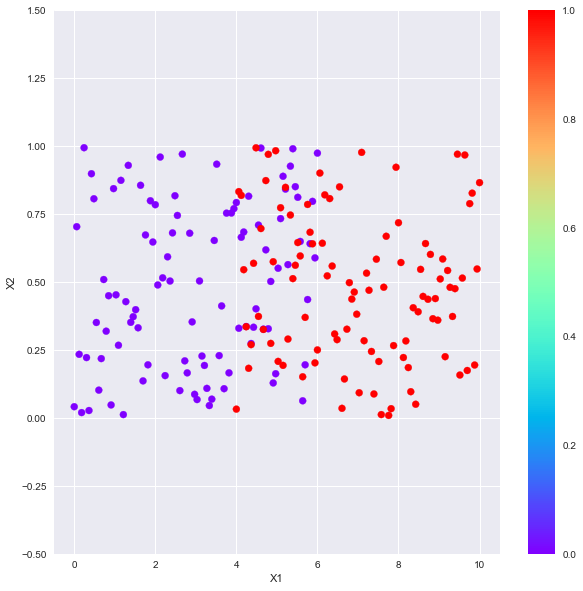

In [3]:
labels = Y

plt.figure(figsize=(10,10))
plt.scatter(data.X1,data.X2, label='Failed', c=labels, cmap='rainbow');
plt.xlabel('X1')
plt.ylabel('X2')
plt.ylim(-0.5,1.5)
plt.colorbar();

## Build Logistic Regression Model

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X1, Y, test_size=0.33, random_state=24)

log_regr = LogisticRegression()

log_regr.fit(X_train.reshape(-1,1), y_train)
log_regr.score(X_test.reshape(-1,1), y_test)

beta0 = log_regr.intercept_[0]
beta1 = log_regr.coef_[0][0]

print 'Slope                      : %r' % beta1
print 'Intercept                  : %r' % beta0
print 'Mean Accuracy of test data : %r' % log_regr.score(X_test.reshape(-1,1), y_test)


Slope                      : 0.77570209359875375
Intercept                  : -3.7513785112263616
Mean Accuracy of test data : 0.84848484848484851


In [5]:
def logit(beta0, beta1, x):
    num = np.exp(beta0 + beta1*x)
    denom = 1 + num
    
    return num/denom

x = np.linspace(0,10,1000)
f = logit(beta0, beta1, x)

decision_bound = -beta0/beta1

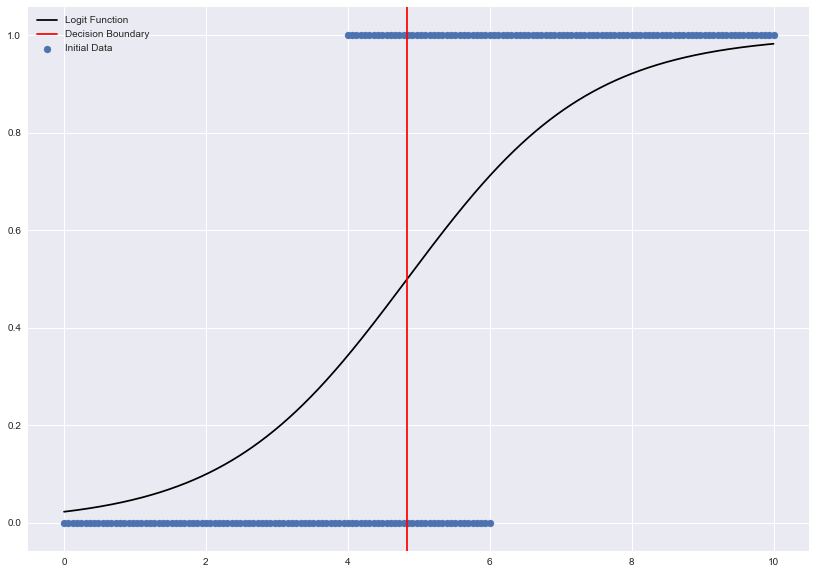

In [6]:
plt.figure(figsize=(14,10))
plt.scatter(X1, Y, label='Initial Data')
plt.plot(x,f,'k', label='Logit Function');
plt.axvline(decision_bound, color='r', label='Decision Boundary') 
plt.legend();